In [4]:
# Import seaborn
import seaborn as sns

**Behind the scenes, seaborn uses matplotlib to draw its plots**. For interactive work, it’s recommended to use a Jupyter/IPython interface in matplotlib mode, or else you’ll have to call matplotlib.pyplot.show() when you want to see the plot.

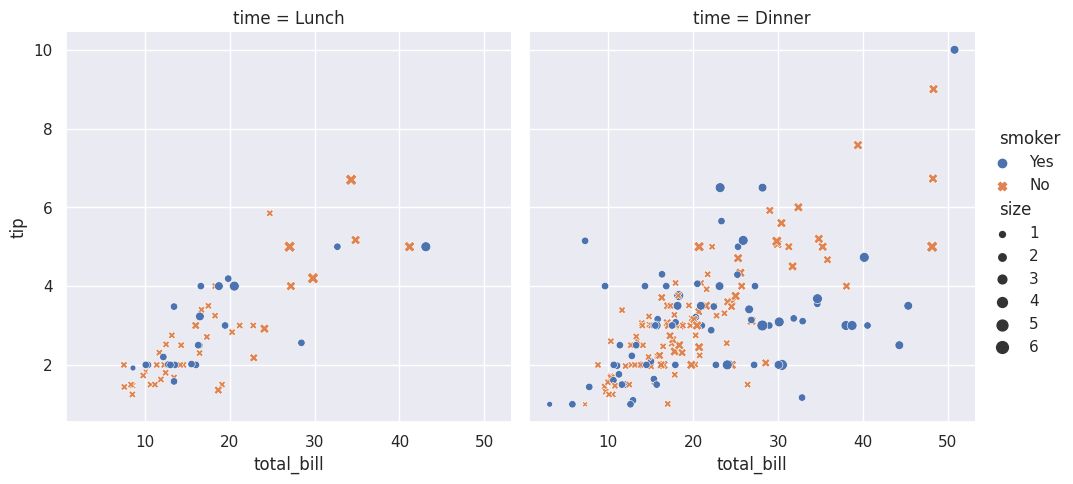

In [9]:

# Apply the default theme
sns.set_theme()
# This uses the matplotlib rcParam system and will affect how all matplotlib plots look, even if you don’t make them with seaborn

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

## API abstraction across visualizations¶


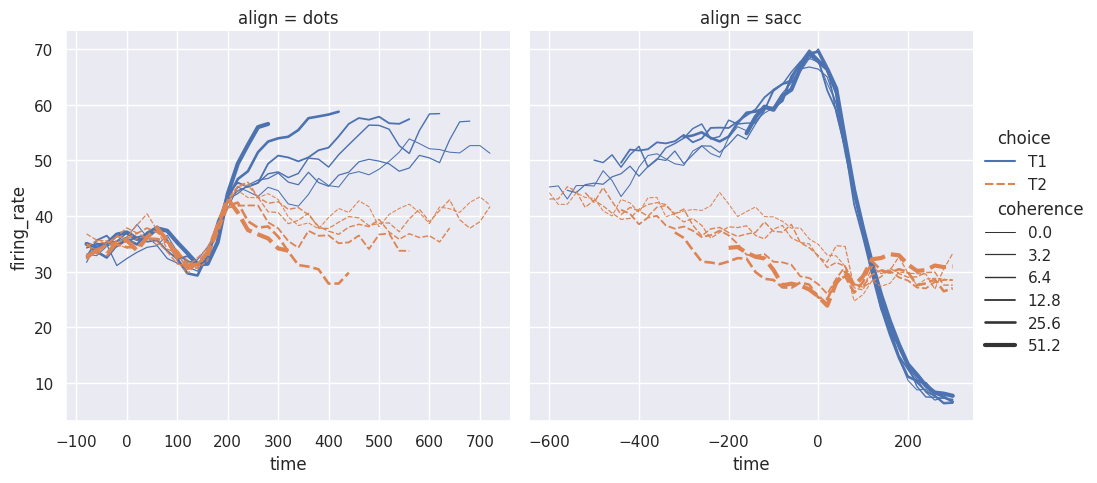

In [10]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

## Statistical estimation and error bars¶


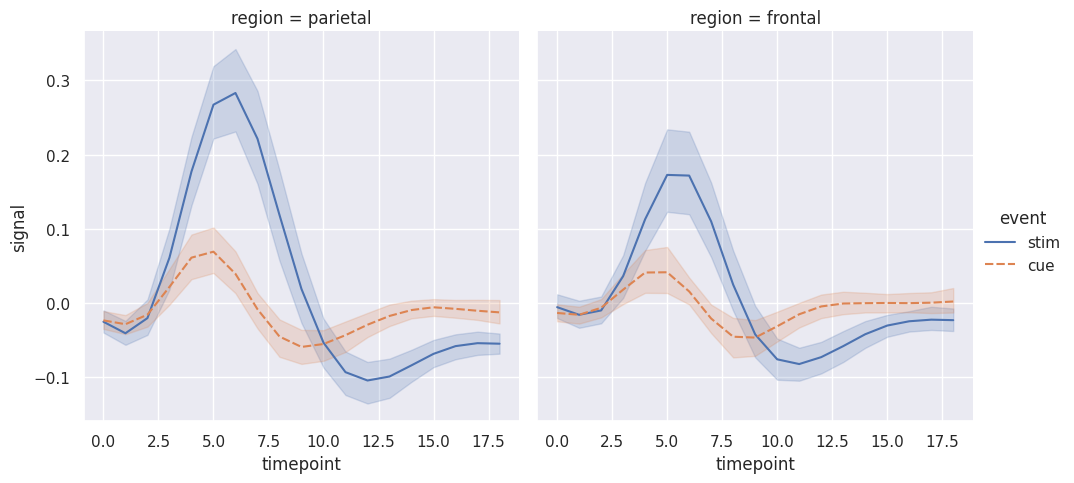

In [11]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

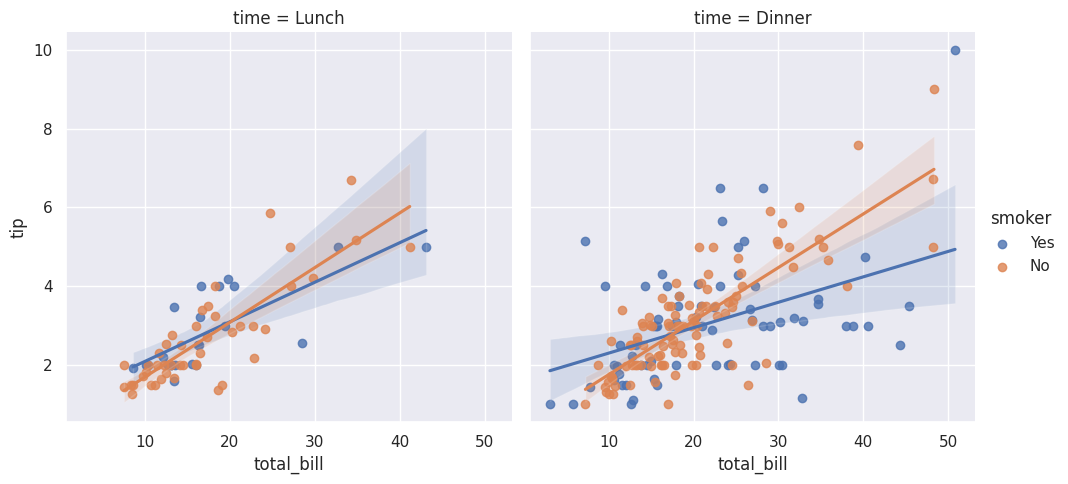

In [12]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")


### Informative distributional summaries¶

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:


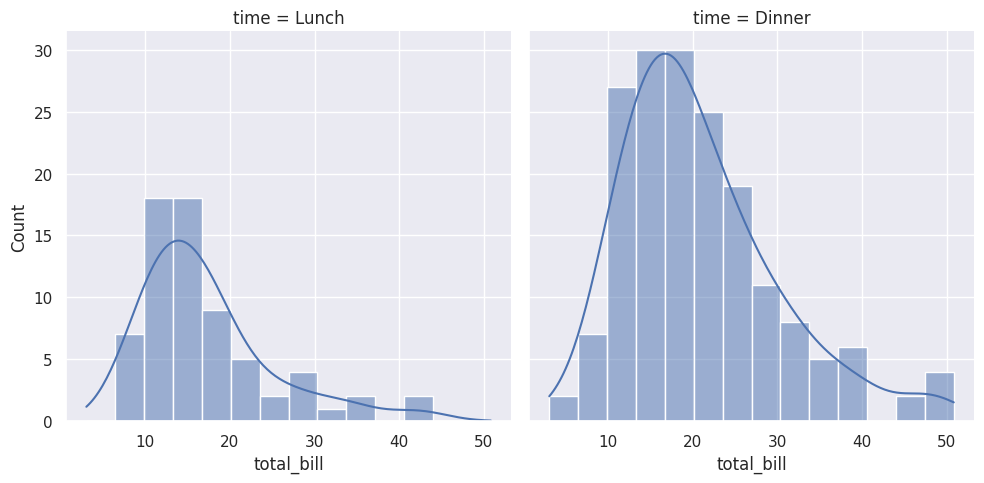

In [13]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)


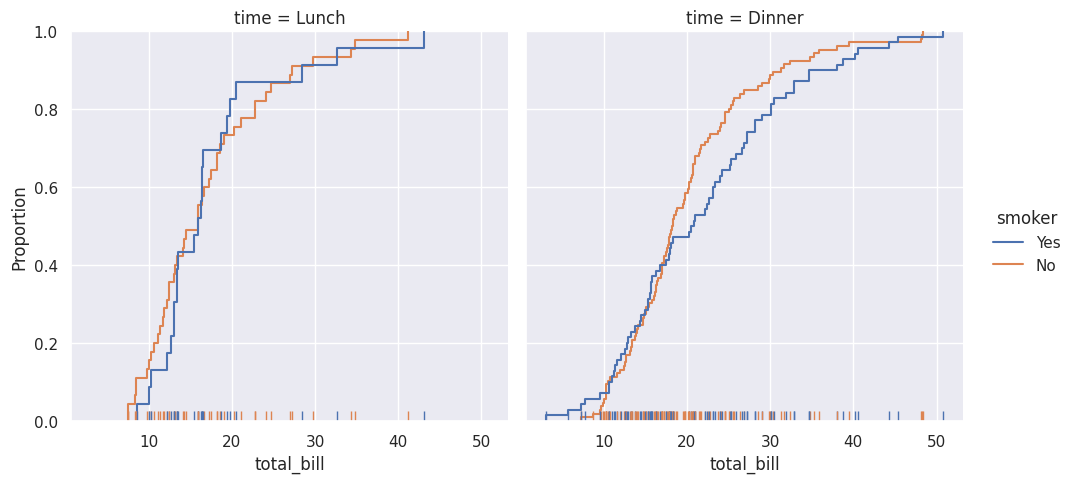

In [15]:
# ecdf = empirical cumulative distribution function
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)


### Specialized plots for categorical data¶


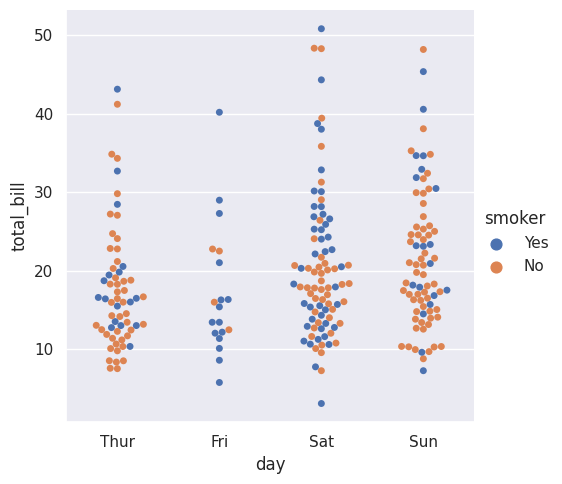

In [22]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
# tips.day.nunique()


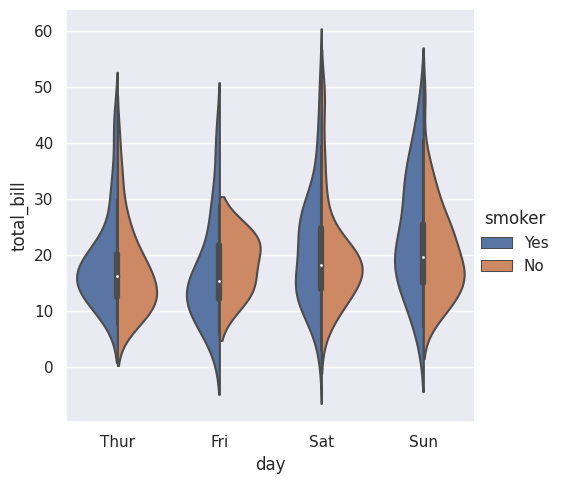

In [23]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)


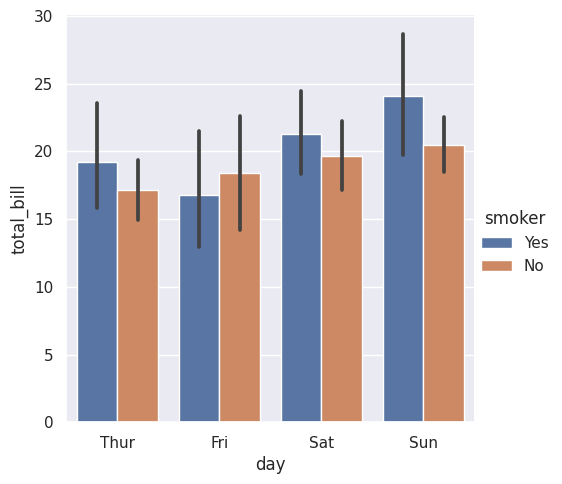

In [24]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")


### Composite views onto multivariate datasets¶


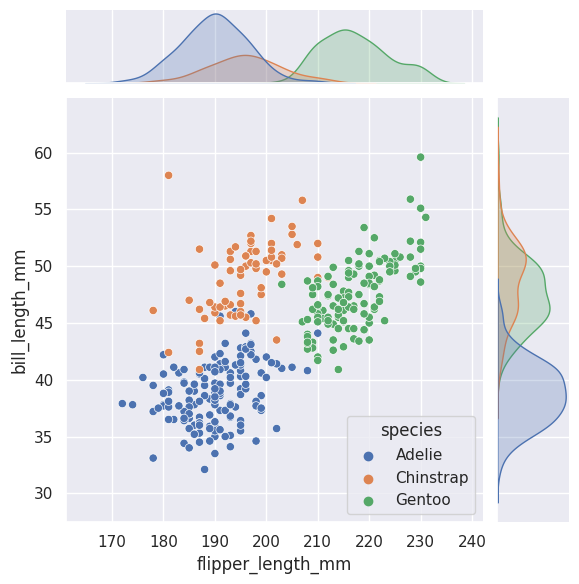

In [31]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

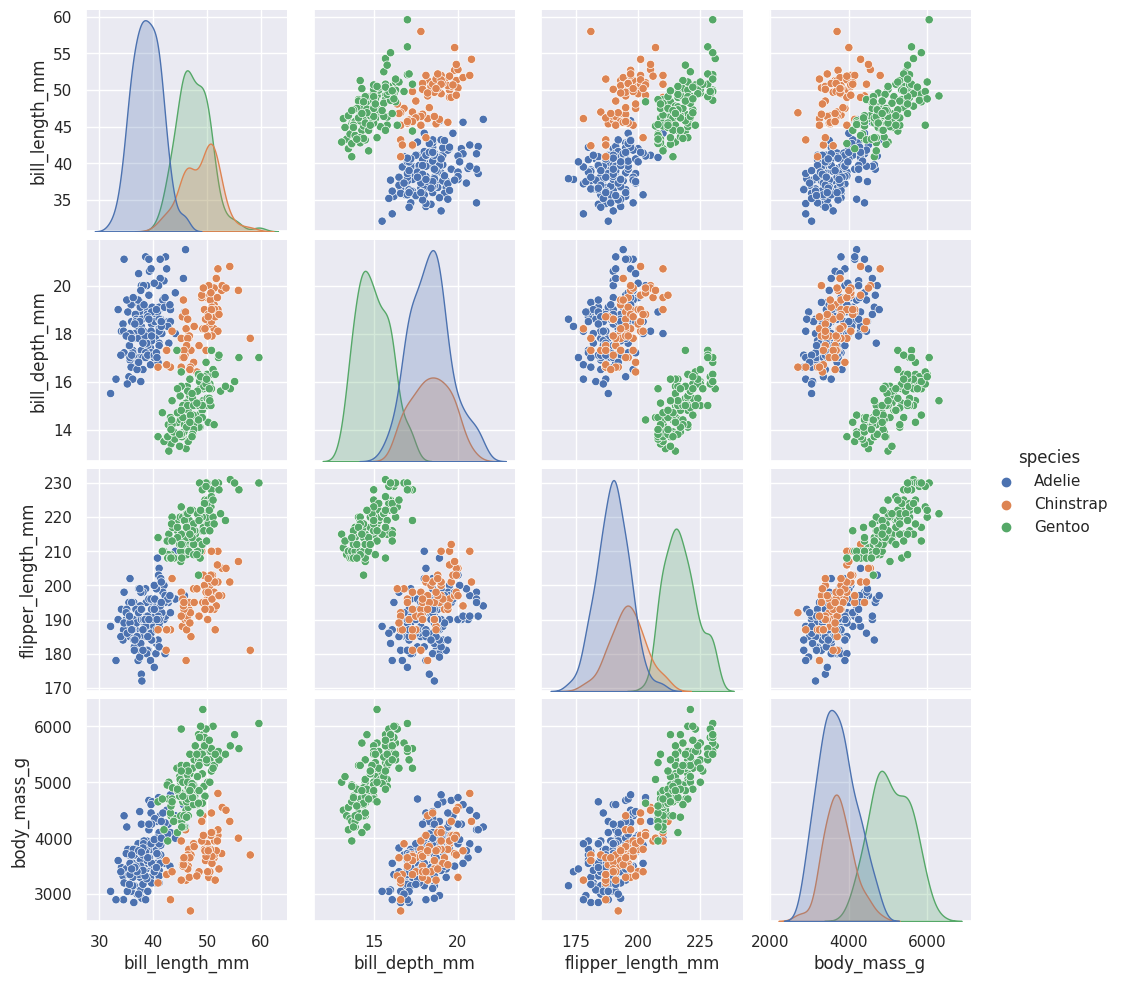

In [33]:
sns.pairplot(data=penguins, hue="species")


### Classes and functions for making complex graphics

In [37]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


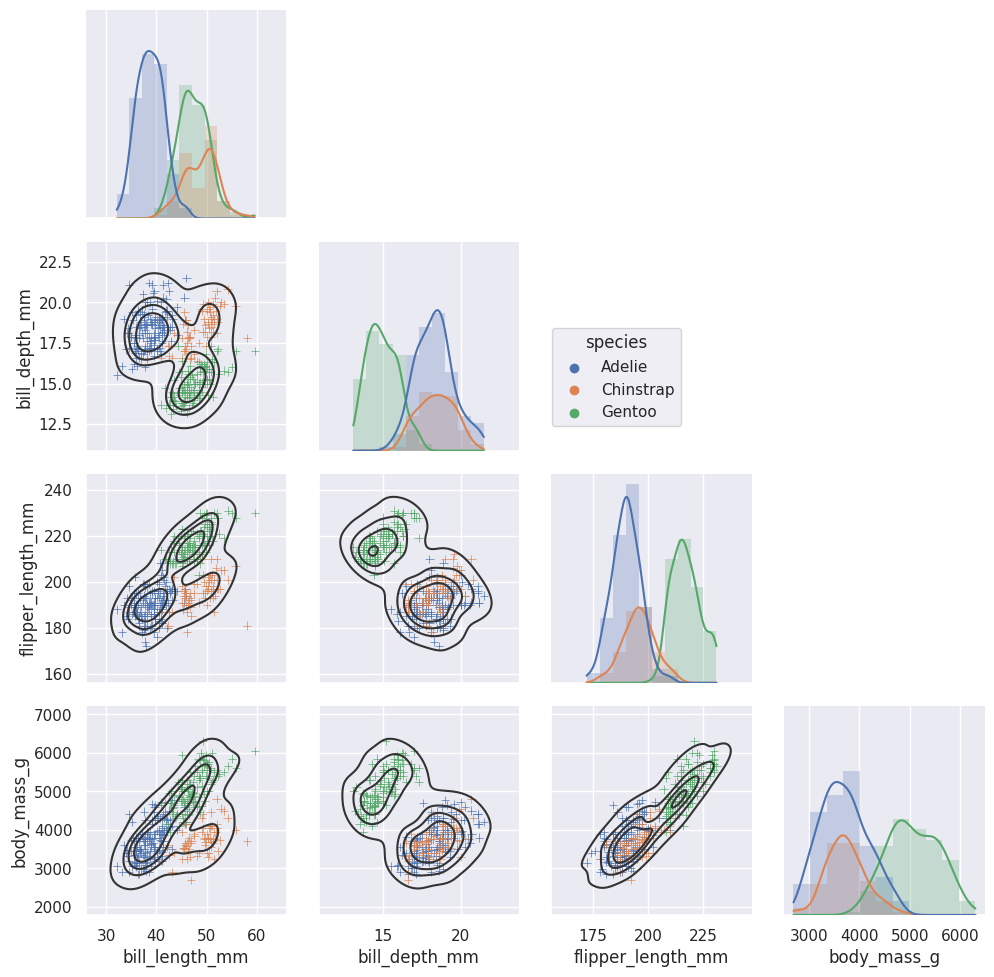

In [44]:
g = sns.PairGrid(penguins, hue="species", corner=True)
# type(g)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

### Opinionated defaults and flexible customization

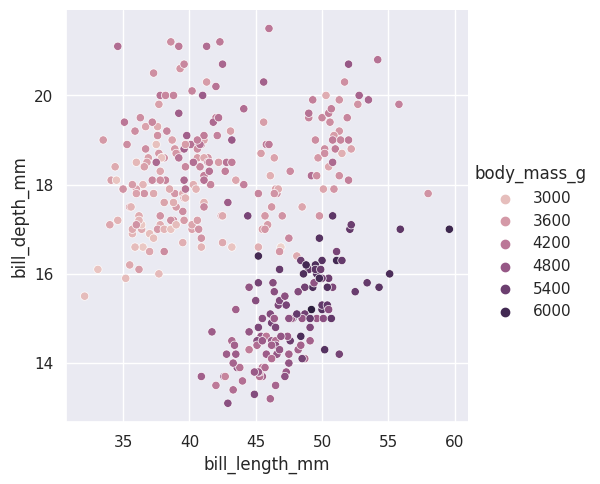

In [45]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

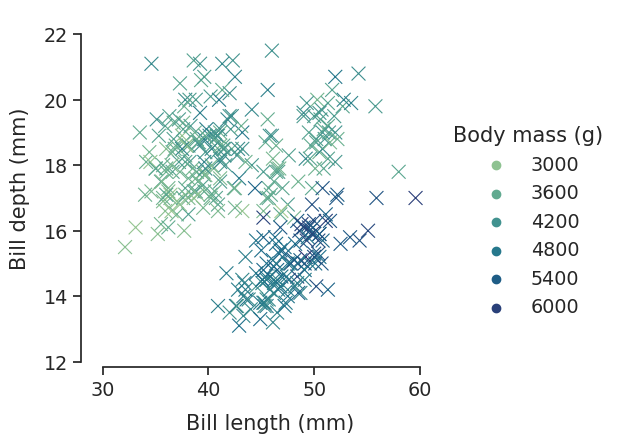

In [46]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)